# Speech Digit Dataset

This notebook shows you how to prepare a synthetic dataset of speech data for digits 0-9.

This project is motivated by the desire to create a dataset similar to MNIST but for speech data.

## Installation

Python==3.10
piper-tts==1.2.0



In [155]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sripaadsrinivasan/audio-mnist")

print("Path to dataset files:", path)

/home/jo/miniconda3/envs/lasm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 948M/948M [00:15<00:00, 64.1MB/s] 

Extracting files...


Path to dataset files: /home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1


In [163]:
from pathlib import Path

audio_mnist_path = Path(path)
print(audio_mnist_path)

files = list(audio_mnist_path.rglob('*.wav'))

print(files[:5])

# list all files in the audio_mnist_path

/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1
[PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/7_48_20.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/9_48_44.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/8_48_17.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/5_48_27.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/7_48_43.wav')]


In [1]:

voices = {
    "amy": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/amy/medium/en_US-amy-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/amy/medium/en_US-amy-medium.onnx.json?download=true.json"
    },
    "arctic": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/arctic/medium/en_US-arctic-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/arctic/medium/en_US-arctic-medium.onnx.json?download=true.json"
    },
    "bryce": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/bryce/medium/en_US-bryce-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/bryce/medium/en_US-bryce-medium.onnx.json?download=true.json"
    },
    "danny": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/danny/low/en_US-danny-low.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/danny/low/en_US-danny-low.onnx.json?download=true.json"
    },
    "hfc_female": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/hfc_female/medium/en_US-hfc_female-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/hfc_female/medium/en_US-hfc_female-medium.onnx.json?download=true.json"
    },
    "hfc_male": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/hfc_male/medium/en_US-hfc_male-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/hfc_male/medium/en_US-hfc_male-medium.onnx.json?download=true.json"
    },
    "joe": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/joe/medium/en_US-joe-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/joe/medium/en_US-joe-medium.onnx.json?download=true.json"
    },
    "john": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/john/medium/en_US-john-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/john/medium/en_US-john-medium.onnx.json?download=true.json"
    },
    "kathleen": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/kathleen/low/en_US-kathleen-low.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/kathleen/low/en_US-kathleen-low.onnx.json?download=true.json"
    },
    "kristin": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/kristin/medium/en_US-kristin-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/kristin/medium/en_US-kristin-medium.onnx.json?download=true.json"
    },
    "kusal": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/kusal/medium/en_US-kusal-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/kusal/medium/en_US-kusal-medium.onnx.json?download=true.json"
    },
    "l2arctic": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/l2arctic/medium/en_US-l2arctic-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/l2arctic/medium/en_US-l2arctic-medium.onnx.json?download=true.json"
    },
    "lessac": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/lessac/medium/en_US-lessac-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/lessac/medium/en_US-lessac-medium.onnx.json?download=true.json"
    },
    "libritts": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/libritts/high/en_US-libritts-high.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/libritts/high/en_US-libritts-high.onnx.json?download=true.json"
    },
    "libritts_r": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/libritts_r/medium/en_US-libritts_r-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/libritts_r/medium/en_US-libritts_r-medium.onnx.json?download=true.json"
    },
    "ljspeech": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/ljspeech/medium/en_US-ljspeech-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/ljspeech/medium/en_US-ljspeech-medium.onnx.json?download=true.json"
    },
    "norman": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/norman/medium/en_US-norman-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/norman/medium/en_US-norman-medium.onnx.json?download=true.json"
    },
    "ryan": {
        "model": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/ryan/medium/en_US-ryan-medium.onnx?download=true",
        "config": "https://huggingface.co/rhasspy/piper-voices/resolve/v1.0.0/en/en_US/ryan/medium/en_US-ryan-medium.onnx.json?download=true.json"
    }
}



In [ ]:

# download voice models

import os
import subprocess

for voice, urls in voices.items():
    # Create directory for the voice
    voice_dir = os.path.join('voices', voice)
    os.makedirs(voice_dir, exist_ok=True)
    print(voice_dir)
    
    
    # Download model file
    model_url = urls['model']
    model_filename = os.path.join(voice_dir, f'{voice}_model.onnx')
    subprocess.run(['wget', '-O', model_filename, model_url], check=True)
    
    # Download config file
    config_url = urls['config']
    config_filename = os.path.join(voice_dir, f'{voice}_config.json')
    subprocess.run(['wget', '-O', config_filename, config_url], check=True)
    
    print(f"Downloaded files for {voice}")
    

In [1]:
# playing with some data augmentation
import numpy as np
import librosa

def noise(data, noise_amt=0.035):
    noise_amp = noise_amt*np.random.uniform()*np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

In [10]:
import os
import glob
import subprocess
import librosa
import numpy as np
import soundfile as sf
from tqdm import tqdm



# get all files in jo_digits/unprocessed
files = glob.glob('jo_digits/unprocessed/*')
print(files)

for file in files:
    # get the digit from the file name
    digit = file.split('/')[-1].split('_')[1].split('.')[0]
    
    # create the directory if it doesn't exist
    os.makedirs(f'jo_digits/processed/{digit}', exist_ok=True)

    # load file with sf
    audio, sample_rate = sf.read(file)

    for i in range(10):
        
        processed_audio = noise(audio, np.random.uniform(0.001, 0.01))
        processed_audio = stretch(processed_audio, rate=np.random.uniform(0.8, 1.2))
        processed_audio = shift(processed_audio)
        processed_audio = pitch(processed_audio, sample_rate, n_steps=np.random.randint(-2, 2))

        sf.write(f'jo_digits/processed/{digit}/{digit}_{i}.wav', processed_audio, sample_rate)



['jo_digits/unprocessed/jo_8.wav', 'jo_digits/unprocessed/jo_2.wav', 'jo_digits/unprocessed/jo_6.wav', 'jo_digits/unprocessed/jo_9.wav', 'jo_digits/unprocessed/jo_4.wav', 'jo_digits/unprocessed/jo_5.wav', 'jo_digits/unprocessed/jo_1.wav', 'jo_digits/unprocessed/jo_0.wav', 'jo_digits/unprocessed/jo_3.wav', 'jo_digits/unprocessed/jo_7.wav']


In [11]:
# get all of the fies in speech_digits with glob
import glob

files = glob.glob('jo_digits/processed/*/*')

print(len(files))
print(files[:5])


100
['jo_digits/processed/8/8_6.wav', 'jo_digits/processed/8/8_1.wav', 'jo_digits/processed/8/8_8.wav', 'jo_digits/processed/8/8_3.wav', 'jo_digits/processed/8/8_0.wav']


180180
['speech_digits/8/arctic_8_shift_55.wav', 'speech_digits/8/hfc_female_8_pitch_33.wav', 'speech_digits/8/arctic_8_noise_113.wav', 'speech_digits/8/bryce_8_shift_208.wav', 'speech_digits/8/joe_8_noise_120.wav']


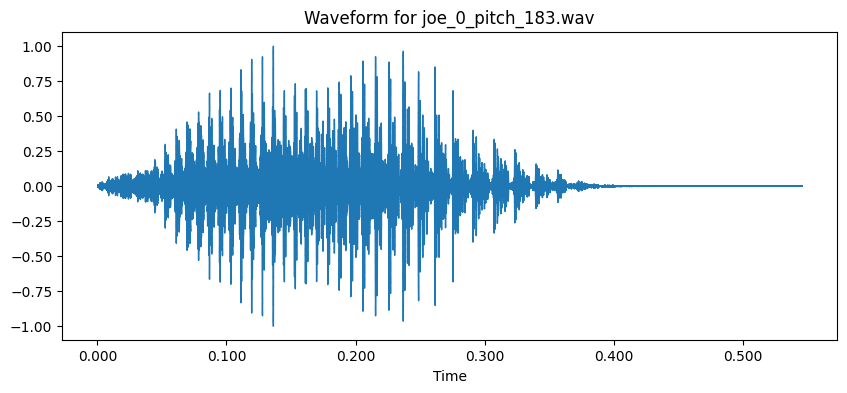

<Figure size 1000x400 with 0 Axes>

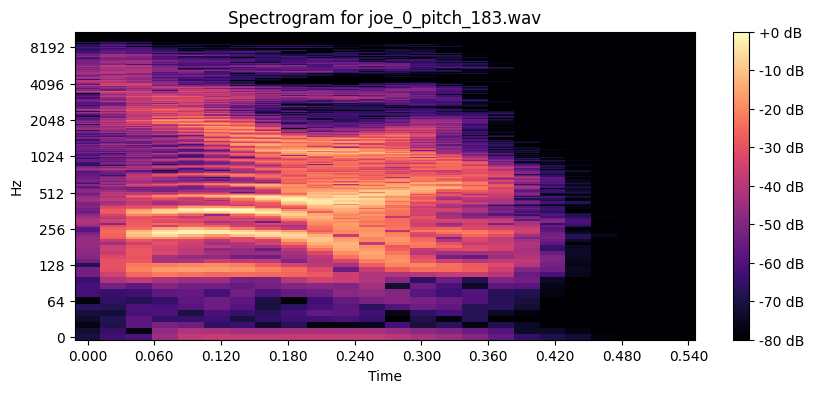

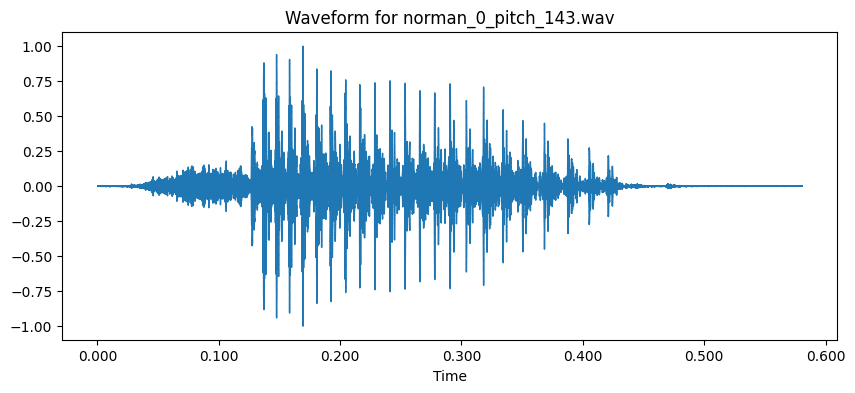

<Figure size 1000x400 with 0 Axes>

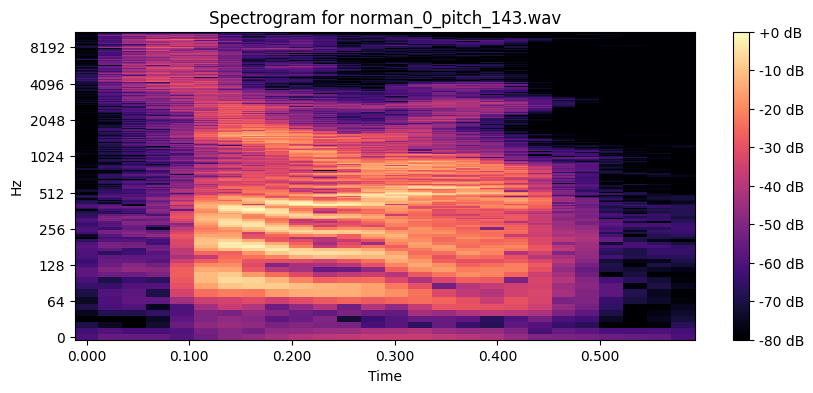

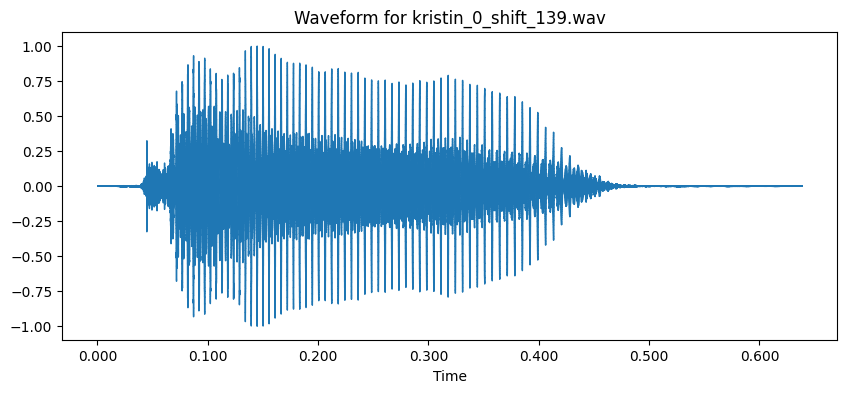

<Figure size 1000x400 with 0 Axes>

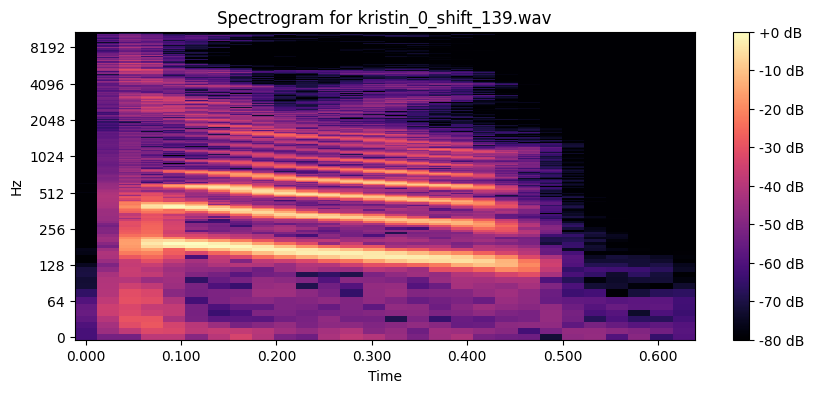

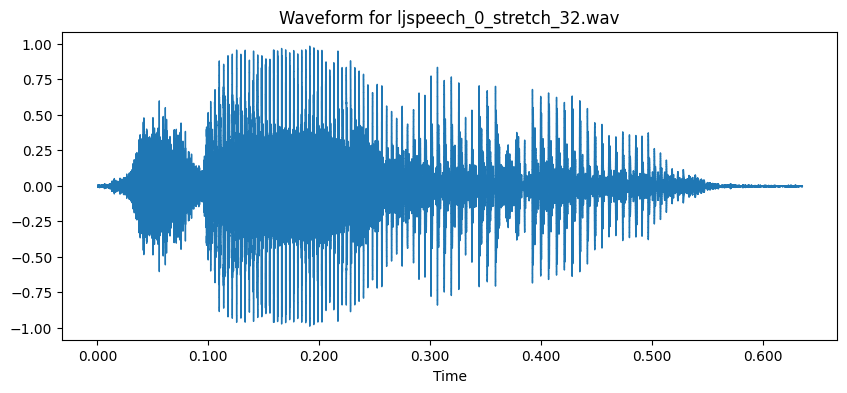

<Figure size 1000x400 with 0 Axes>

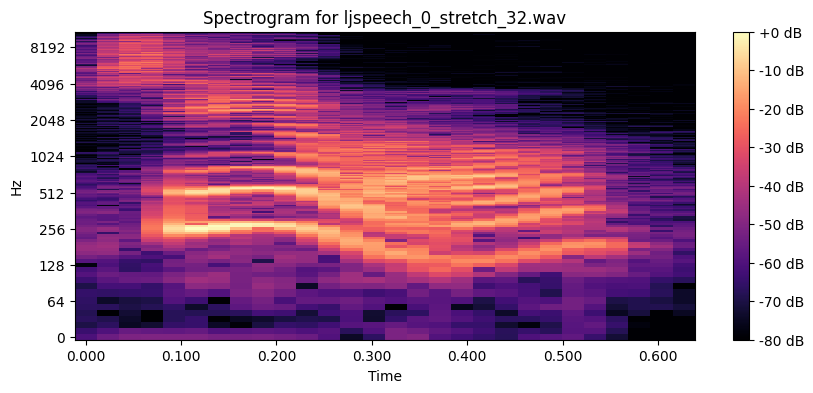

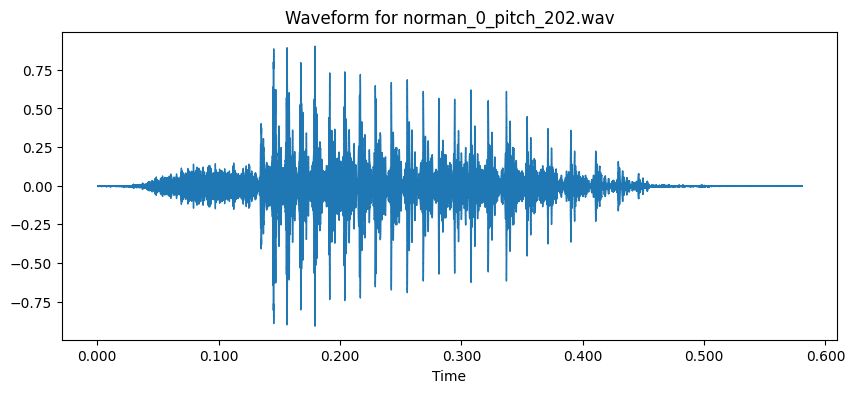

<Figure size 1000x400 with 0 Axes>

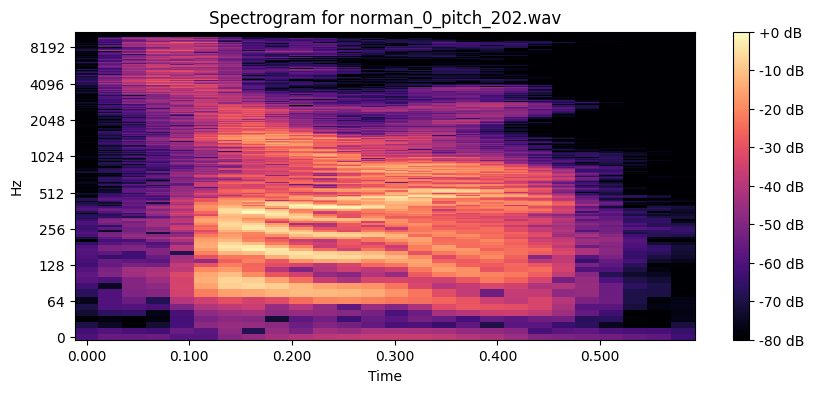

In [6]:
# display spectogramand audio player for all files in speech_digits/0
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display


# Define the directory for digit 0
digit_dir = 'speech_digits/0'

# Get all files in the digit directory
files = glob.glob(os.path.join(digit_dir, '*.wav'))

# Display spectogram and audio player for each file
for file in files[:5]:
    # Load the audio file
    y, sr = librosa.load(file, sr=None)
    
    # Display the spectogram
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform for {os.path.basename(file)}')
    plt.show()
    
    # Display the spectogram
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for {os.path.basename(file)}')
    plt.show()


    display(Audio(file))




In [14]:
# preprocess audio files so that they are all the same length

import glob
import torch as t
import librosa
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import soundfile as sf
import numpy as np

files = glob.glob('speech_digits/*/*')
print(f"Total files: {len(files)}")

audio_data = []
labels = []
longest_audio_file_length = 0

# First pass: load data and find longest audio file
for f in tqdm(files):
    try:
        audio, sample_rate = librosa.load(f)
        if len(audio) == 0:
            print(f"Warning: Empty audio file: {f}")
            continue
        labels.append(int(f.split('/')[-2]))  # Adjust this based on your file structure
        longest_audio_file_length = max(longest_audio_file_length, len(audio))
    except Exception as e:
        print(f"Error processing file {f}: {str(e)}")

print(f"Longest audio size: {longest_audio_file_length}")


100%|██████████| 180180/180180 [00:46<00:00, 3847.23it/s]


Longest audio size: 73150
Number of valid audio files: 0


100%|██████████| 180180/180180 [02:33<00:00, 1177.14it/s]

All files have the same size: 73150 samples


In [ ]:

# Second pass: Pad audio files and resave them
for f in tqdm(files):
    try:
        audio, sample_rate = librosa.load(f)
        if len(audio) == 0:
            print(f"Warning: Empty audio file: {f}")
            continue
        current_size = len(audio)
        pad_size = longest_audio_file_length - current_size
        left_pad = pad_size // 2
        right_pad = pad_size - left_pad
        padded_audio = np.pad(audio, (left_pad, right_pad), mode='constant')
        sf.write(f, padded_audio, sample_rate)
    except Exception as e:
        print(f"Error processing file {f}: {str(e)}")


In [ ]:

# Third pass: Verify that all files have the same size
file_sizes = []
for f in tqdm(files):
    try:
        audio, _ = librosa.load(f)
        file_sizes.append(len(audio))
    except Exception as e:
        print(f"Error processing file {f}: {str(e)}")

if len(set(file_sizes)) == 1:
    print(f"All files have the same size: {file_sizes[0]} samples")
else:
    print("Warning: Not all files have the same size")
    print(f"Unique file sizes: {set(file_sizes)}")
    print(f"Min size: {min(file_sizes)}, Max size: {max(file_sizes)}")

#padded_audio_data = list(map(pad_audio, audio_data))

# Convert labels to tensor
#label_tensor = t.tensor(labels)


In [165]:
print(files[:5)
print(labels[:5])


[PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/7_48_20.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/9_48_44.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/8_48_17.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/5_48_27.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/7_48_43.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/6_48_15.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/1_48_39.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/0_48_15.wav'), PosixPath('/home/jo/.cache/kagglehub/datasets/sripaadsrinivasan/audio-mnist/versions/1/data/48/8_48_12.wav'), PosixPath

In [168]:
from torchaudio import transforms
import torchaudio
import random

class AudioDataset(Dataset):
    def __init__(self, file_paths, labels, transforms=transforms.MelSpectrogram()):
        self.file_paths = file_paths
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):

        audio_path = self.file_paths[idx]

        waveform, _ = torchaudio.load(audio_path)

        # ensure its mono
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0).unsqueeze(0)

        # apply transforms
        if self.transforms:
            spec = self.transforms(waveform)
        return spec, self.labels[idx]


## create a small dataset for testing
shuffle_files = files.copy()
random.shuffle(shuffle_files)

print(type(labels))

small_files = shuffle_files[:10000]
small_labels = [ int(f.split('/')[-2]) for f in small_files ]

print(small_files[:5])
print(small_labels[:5])


# Create datasets
full_dataset = AudioDataset(files, labels, transforms=transforms.MelSpectrogram())
small_dataset = AudioDataset(small_files, small_labels, transforms=transforms.MelSpectrogram())


train_size = int(0.8 * len(small_dataset))
test_size = len(small_dataset) - train_size
train_dataset, test_dataset = t.utils.data.random_split(small_dataset, [train_size, test_size])


#train_size = int(0.8 * len(full_dataset))
#test_size = len(full_dataset) - train_size
#train_dataset, test_dataset = t.utils.data.random_split(full_dataset, [train_size, test_size])


# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

<class 'list'>
['speech_digits/1/hfc_male_1_shift_76.wav', 'speech_digits/0/kristin_0_shift_153.wav', 'speech_digits/4/amy_4_shift_99.wav', 'speech_digits/8/norman_8_shift_234.wav', 'speech_digits/5/hfc_male_5_shift_136.wav']
[1, 0, 4, 8, 5]
Number of training batches: 250
Number of test batches: 63


In [169]:
import matplotlib.pyplot as plt

# see a batch
for batch in train_loader:
    inputs, targets = batch
    print(inputs.shape)
    print(inputs[0][0].shape)


    print(targets)
    break



torch.Size([32, 1, 128, 366])
torch.Size([128, 366])
tensor([2, 0, 1, 6, 3, 5, 7, 3, 5, 5, 4, 0, 5, 0, 9, 5, 9, 7, 0, 0, 5, 8, 4, 4,
        6, 3, 3, 1, 8, 5, 5, 6])


In [93]:
# create our model, a simple MLP

model = t.nn.Sequential(
    t.nn.Flatten(),
    t.nn.Linear(128*366, 512), # 128 mel bins, 366 time steps
    t.nn.ReLU(),
    t.nn.Linear(512, 512),
    t.nn.ReLU(),
    t.nn.Linear(512, 10),
    t.nn.Softmax(dim=1)
)

In [94]:
# check out device
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


In [95]:
# train our model
from tqdm import tqdm

device = t.device('cuda' if t.cuda.is_available() else 'cpu')

model.to(device)

loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.001)

epochs = 10

print(f"Training for {epochs} epochs")
for epoch in tqdm(range(epochs)):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# evaluate our model

model.eval()

correct = 0
total = 0

with t.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        _, predicted = t.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f"Accuracy of the model on the test set: {100 * correct / total}%")



Training for 10 epochs


 10%|█         | 1/10 [00:09<01:25,  9.56s/it]

Epoch 1/10, Loss: 2.336150884628296


 20%|██        | 2/10 [00:18<01:14,  9.35s/it]

Epoch 2/10, Loss: 2.242400884628296


 30%|███       | 3/10 [00:27<01:03,  9.14s/it]

Epoch 3/10, Loss: 2.398650884628296


 40%|████      | 4/10 [00:36<00:54,  9.00s/it]

Epoch 4/10, Loss: 2.336150884628296


 50%|█████     | 5/10 [00:45<00:44,  8.89s/it]

Epoch 5/10, Loss: 2.461150884628296


 60%|██████    | 6/10 [00:53<00:35,  8.86s/it]

Epoch 6/10, Loss: 2.398650884628296


 70%|███████   | 7/10 [01:02<00:26,  8.79s/it]

Epoch 7/10, Loss: 2.429900884628296


 80%|████████  | 8/10 [01:11<00:17,  8.75s/it]

Epoch 8/10, Loss: 2.367400884628296


 90%|█████████ | 9/10 [01:20<00:08,  8.86s/it]

Epoch 9/10, Loss: 2.304900884628296


100%|██████████| 10/10 [01:29<00:00,  8.95s/it]


Epoch 10/10, Loss: 2.336150884628296
Accuracy of the model on the test set: 12.5%


In [103]:
import torch.nn as nn
from tqdm import tqdm

class ConvModel(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate the size of the flattened features
        self.flat_features = 128 * (128 // 8) * (366 // 8)
        
        self.fc1 = nn.Linear(self.flat_features, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Input shape: (batch_size, 1, 128, 366)
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, self.flat_features)
        x = self.relu4(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model
conv_model = ConvModel()
print(conv_model)

# Move model to the appropriate device
conv_model = conv_model.to(device)

loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(conv_model.parameters(), lr=0.001)

epochs = 10

print(f"Training for {epochs} epochs")
for epoch in tqdm(range(epochs)):
    conv_model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = conv_model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# evaluate our model

conv_model.eval()

correct = 0
total = 0

with t.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = conv_model(inputs)
        _, predicted = t.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f"Accuracy of the conv model on the test set: {100 * correct / total}%")


















































































































































































































Epoch 8/10: 100%|██████████| 250/250 [01:45<00:00,  2.38it/s]


Epoch 8/10, Loss: 0.024036290124058723





























































































































































































































































Epoch 9/10: 100%|██████████| 250/250 [01:46<00:00,  2.36it/s]


Epoch 9/10, Loss: 0.004436320625245571





























































































































































































































































100%|██████████| 10/10 [16:55<00:00, 101.56s/it]


Epoch 10/10, Loss: 0.23865163326263428
Accuracy of the conv model on the test set: 98.05%


In [104]:
# save the model with today's date
import datetime
date = datetime.datetime.now().strftime("%Y-%m-%d")
t.save(conv_model.state_dict(), f'conv_model_{date}.pth')



In [ ]:
# save the model with today's date for cpu
t.save(conv_model.state_dict(), f'conv_model_{date}_cpu.pth')

In [105]:
# load the model
conv_model_loaded = ConvModel()
conv_model_loaded.load_state_dict(t.load(f'conv_model_{date}.pth'))



/tmp/ipykernel_551388/2525434788.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  conv_model_loaded.load_state_dict(t.load(f'conv_model_{date}.pth'))


<All keys matched successfully>

speech_digits/5/kusal_5_stretch_15.wav


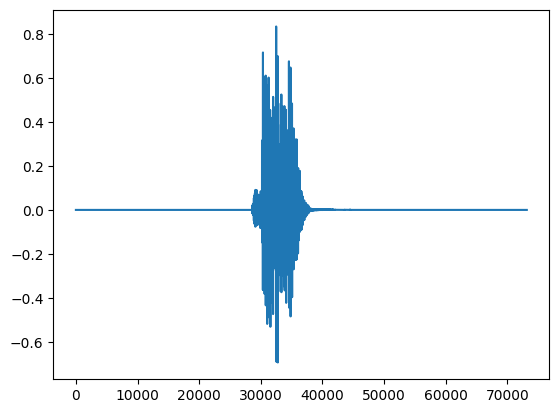

torch.Size([1, 128, 366])
prediction:  5
actual:  5


In [176]:
# evaluate the loaded model
from IPython.display import display, Audio

# pick a random file from the test set
random_file = files[random.randint(0, len(files[10000:])-1)]
print(random_file)

# load the audio
waveform, sr = torchaudio.load(random_file)

# display the waveform
plt.figure()
plt.plot(waveform.flatten())
plt.show()

# display player
display(Audio(waveform, rate=sr))

# convert to spectrogram
spec = torchaudio.transforms.MelSpectrogram()(waveform)

print(spec.shape)
# pass spec into model
outputs = conv_model_loaded(spec)

# print the output
print("prediction: ", outputs.argmax().item())
print("actual: ", random_file.split('/')[-2])


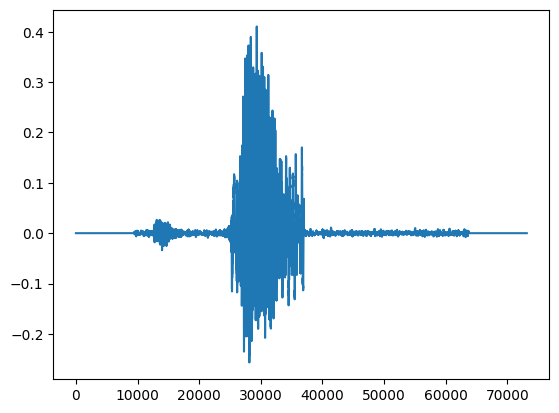

torch.Size([1, 128, 366])
prediction:  3


In [178]:
# try on real data!
# evaluate the loaded model
from IPython.display import display, Audio

# pick a random file from the test set

# load the audio
waveform, sr = torchaudio.load('real_data/three_padded.wav')

# display the waveform
plt.figure()
plt.plot(waveform.flatten())
plt.show()

# display player
display(Audio(waveform, rate=sr))

# convert to spectrogram
spec = torchaudio.transforms.MelSpectrogram()(waveform)
print(spec.shape)

# pass spec into model
outputs = conv_model_loaded(spec)

# print the output
print("prediction: ", outputs.argmax().item())

